In [1]:
import mne
import numpy as np
import librosa
import os
import pandas as pd

base_path = '/Users/derekrosenzweig/Library/CloudStorage/GoogleDrive-dr2633@stanford.edu/My Drive/EEG-tones/Data/tones-data'

file = f'{base_path}/sub-01-synchronization-test.mff'


# Read in mff data with read_raw_egi
raw = mne.io.read_raw_egi(file)

# Get channel names
channel_names = raw.ch_names
print("\nChannel names:")
print(channel_names)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Reading EGI MFF Header from /Users/derekrosenzweig/Library/CloudStorage/GoogleDrive-dr2633@stanford.edu/My Drive/EEG-tones/Data/tones-data/sub-01-synchronization-test.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...

Channel names:
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E

In [2]:
# Find the trigger channel
trigger_channel_name = 'STI 014'
trigger_channel_index = channel_names.index(trigger_channel_name)
print(f"\nTrigger channel '{trigger_channel_name}' found at index:", trigger_channel_index)

# Find the reference channel
reference_channel_name = 'VREF'
reference_channel_index = channel_names.index(reference_channel_name)
print(f"\nReference channel '{reference_channel_name}' found at index:", reference_channel_index)

# Extract EEG data
eeg_data = raw.get_data()


Trigger channel 'STI 014' found at index: 131

Reference channel 'VREF' found at index: 128


In [4]:
# Print shape of EEG data
print("\nShape of EEG data:", np.shape(eeg_data))

# Access trigger channel data
trigger_channel_data = eeg_data[trigger_channel_index, :]

# Find events for channel 1 only
events = mne.find_events(raw, stim_channel=trigger_channel_name)

# Filter events where the third column is equal to 1
events_channel_1 = events[events[:, 2] == 1]

# Print the first few events for channel 1
print("\nFirst few events for channel 1:")
print(events_channel_1[:100])



Shape of EEG data: (132, 348673)
689 events found on stim channel STI 014
Event IDs: [1 2]

First few events for channel 1:
[[ 1909     0     1]
 [ 2409     0     1]
 [ 2909     0     1]
 [ 3409     0     1]
 [ 3909     0     1]
 [ 4409     0     1]
 [ 4909     0     1]
 [ 5409     0     1]
 [ 5909     0     1]
 [ 6409     0     1]
 [ 6909     0     1]
 [ 7409     0     1]
 [ 7909     0     1]
 [ 8409     0     1]
 [ 8909     0     1]
 [ 9409     0     1]
 [ 9909     0     1]
 [10409     0     1]
 [10909     0     1]
 [11409     0     1]
 [11909     0     1]
 [12409     0     1]
 [12909     0     1]
 [13409     0     1]
 [13909     0     1]
 [14409     0     1]
 [14909     0     1]
 [15409     0     1]
 [15909     0     1]
 [16409     0     1]
 [16909     0     1]
 [17409     0     1]
 [17909     0     1]
 [18409     0     1]
 [18909     0     1]
 [19409     0     1]
 [19909     0     1]
 [20409     0     1]
 [20909     0     1]
 [21409     0     1]
 [21909     0     1]
 [22409     0 

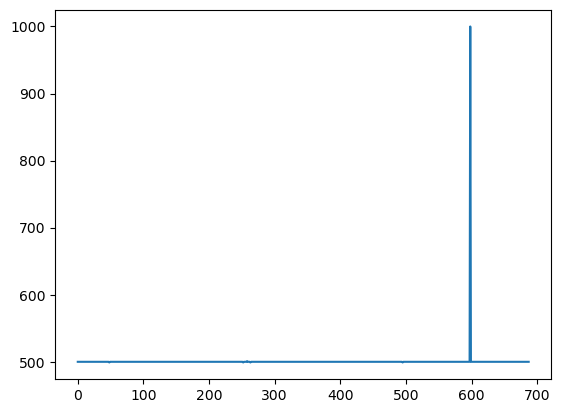

In [5]:
import matplotlib.pyplot as plt

event_times = events[:,0]

plt.plot(np.diff(event_times))
plt.show()